### Model Training

In [7]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [8]:
df = pd.read_csv('/Users/soumya/Development/ML/MLProject/notebook/data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X=df.drop(columns=['math_score'], axis=1)

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
print("Categories in 'gender'' variable:     ", end='')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:      ", end='')
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ", end='')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:       ", end='')
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:    ", end='')
print(df['test_preparation_course'].unique())

Categories in 'gender'' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [14]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [18]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, categorical_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [19]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [21]:
# Separate datasets into †rain and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an evalute function to give all metrics after model training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [40]:
models= {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random forest" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}.".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print('-------------------------------------------------')

    print("Model Performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}.".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model Performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667.
- R2 score: 0.8743
-------------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148.
- R2 score: 0.8804


Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063.
- R2 score: 0.8071
-------------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579.
- R2 score: 0.8253


Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650.
- R2 score: 0.8743
-------------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111.
- R2 score: 0.8806


KNeighborsRegressor
Model Performance for Training set
- Root Mean Squared Error: 5.7172
- Mean Absolute Error: 4

In [43]:
# Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,AdaBoostRegressor,0.853800
5,Random forest,0.852083
7,CatBoostRegressor,0.851632
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783681
4,Decision Tree,0.758279


### Linear Regression

In [46]:
linear = LinearRegression(fit_intercept=True)
linear = linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


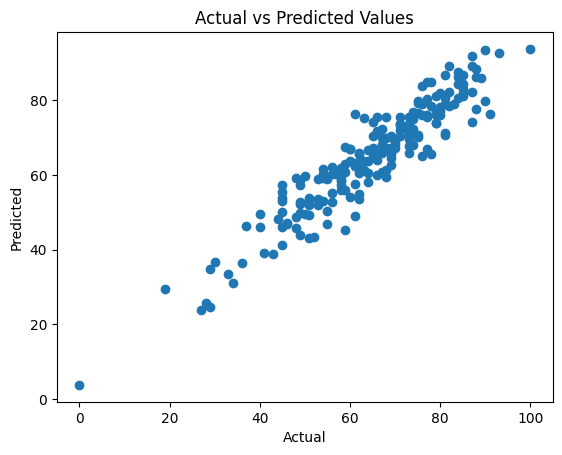

In [49]:
# plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math_score'>

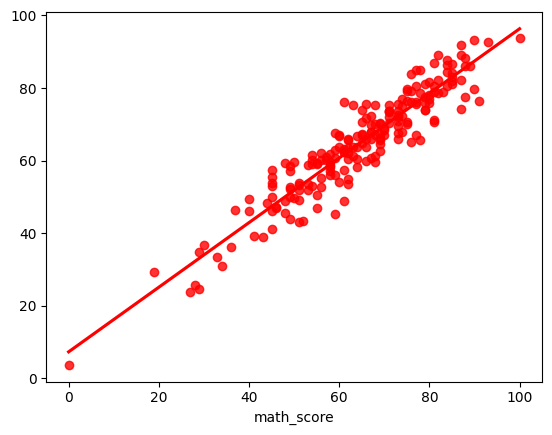

In [50]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='Red')

#### Difference between actual and predicted values

In [52]:
pred_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
